In [1]:
#importing necessary libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, LeakyReLU, ReLU
from keras.optimizers import Adam, Adagrad

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
#Import the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
#The class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#Mean subtraction and normalization on the input data

mean_train = np.mean(x_train)
std_train = np.std(x_train)

mean_test = np.mean(x_test)
std_test = np.std(x_test)

x_train_norm = (x_train - mean_train)/std_train
x_test_norm = (x_test - mean_test)/std_test

# x_train_norm = x_train / 255
# x_test_norm = x_test / 255


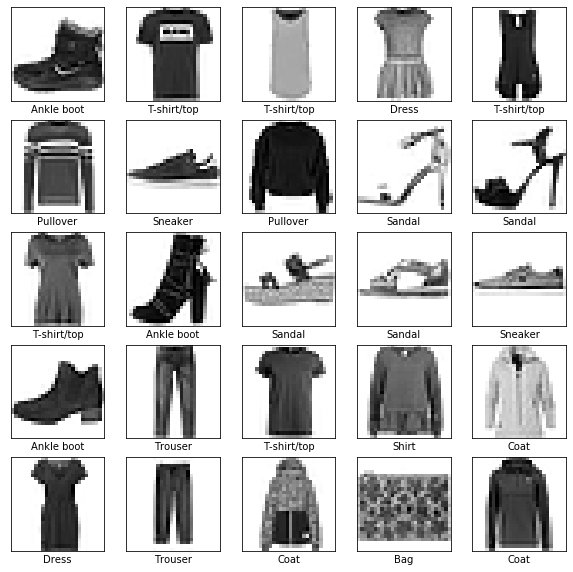

In [5]:
#Checking the first 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_norm[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [6]:
#Splitting the training data to train and verification data
x_train_norm, x_validate, y_train, y_validate = train_test_split(
    x_train_norm, y_train, test_size=0.2, random_state=12345,
)

#Reshaping the data
img_rows = 28
img_cols = 28
batch_size = 512
img_shape = (img_rows, img_cols, 1)

x_train_norm = x_train_norm.reshape(x_train_norm.shape[0], *img_shape)
x_test_norm = x_test_norm.reshape(x_test_norm.shape[0], *img_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *img_shape)

# # One-hot encode the y
# y_train = tf.keras.utils.to_categorical(y_train, 10)
# y_validate = tf.keras.utils.to_categorical(y_validate, 10)
# y_test = tf.keras.utils.to_categorical(y_test, 10)

In [7]:
#Building the model

name = 'Xavier_2Layer'
modelXavier2L = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=img_shape, 
           kernel_initializer=tf.contrib.layers.xavier_initializer(), name='Conv2D_Layer1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D_Layer2'),
    Dropout(0.3, name='Dropout-2'),
    Flatten(name='flatten'),
    Dense(64, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name = 'He_2Layer'
modelHe2L = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=img_shape, kernel_initializer=tf.keras.initializers.he_normal(), name='Conv2D_Layer1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D_Layer2'),
    Dropout(0.3, name='Dropout-2'),
    Flatten(name='flatten'),
    Dense(64, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name='He_3Layer'
modelHe3L = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=img_shape, kernel_initializer=tf.keras.initializers.he_normal(), name='Conv2D_Layer1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.25, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D_Layer2'),
    Dropout(0.25, name='Dropout-2'),
    Conv2D(128, kernel_size=3, activation='relu', name='Conv2D_Layer3'),
    Dropout(0.4, name='Dropout-3'),
    Flatten(name='flatten'),
    Dense(128, activation='relu', name='Dense'),
    Dropout(0.4, name='Dropout'),
    Dense(10, activation='softmax', name='Output')
], name=name)


name = 'Xavier_2Layer_LeakyRELU'
modelXavier2LLeakyRELU = Sequential([
    Conv2D(32, kernel_size=3, input_shape=img_shape, kernel_initializer=tf.contrib.layers.xavier_initializer(), name='Conv2D_Layer1'),
    LeakyReLU(),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout-1'),
    Conv2D(64, kernel_size=3, name='Conv2D_Layer2'),
    LeakyReLU(),
    Dropout(0.3, name='Dropout-2'),
    Flatten(name='flatten'),
    Dense(64, name='Dense'),
    LeakyReLU(),
    Dense(10, activation='softmax', name='Output')
], name=name)

name = 'He_2Layer_L2'
modelHe2LL2 = Sequential([
    Conv2D(32, kernel_size=3, input_shape=img_shape, kernel_initializer=tf.keras.initializers.he_normal(), 
           activity_regularizer=tf.keras.regularizers.l2(10e-3), name='Conv2D_Layer1'),
    ReLU(),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Conv2D(64, kernel_size=3, activity_regularizer=tf.keras.regularizers.l2(10e-3), name='Conv2D_Layer2'),
    ReLU(),
    Flatten(name='flatten'),
    Dense(64, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

cnn_models = [modelXavier2L, modelHe2L, modelHe3L, modelXavier2LLeakyRELU, modelHe2LL2]

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [8]:
# train the models and save results to a dict

history_dict = {}

for model in cnn_models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adagrad(),
        metrics=['accuracy']
    )
    
    history = model.fit(
        x_train_norm, y_train,
        batch_size=batch_size,
        epochs=10, verbose=1,
        validation_data=(x_validate, y_validate)
    )
    
    history_dict[model.name] = history



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 21s 428us/step - loss: 0.7843 - acc: 0.7500 - val_loss: 0.4508 - val_acc: 0.8341
Epoch 2/10
48000/48000 [==============================] - 19s 393us/step - loss: 0.4028 - acc: 0.8547 - val_loss: 0.3503 - val_acc: 0.8820
Epoch 3/10
48000/48000 [==============================] - 19s 396us/step - loss: 0.3616 - acc: 0.8708 - val_loss: 0.3288 - val_acc: 0.8855
Epoch 4/10
48000/48000 [==============================] - 19s 404us/step - loss: 0.3350 - acc: 0.8790 - val_loss: 0.2996 - val_acc: 0.8973
Epoch 5/10
48000/48000 [==============================] - 19s 400us/step - loss: 0.3153 - acc: 0.8872 - val_loss: 0.2887 - val_acc: 0.9001
Epoch 6/10
48000/48000 [==============================] - 19s 398us/step - loss: 0.3015 - acc: 0.8916 - val_loss: 0.2770 - val_acc: 0.9049
Epoch 7/10
48000/480

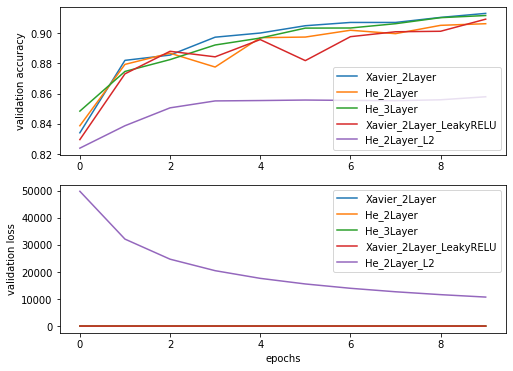

In [9]:
# plot the accuracy and loss

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for history in history_dict:
    val_acc = history_dict[history].history['val_acc']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history)
    ax2.plot(val_loss, label=history)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()